
# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
 
**Задача:** провести исследовательский анализ данных и определить параметры, которые наиболее сильно влияют на цену квартиры.
 



### Изучение данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

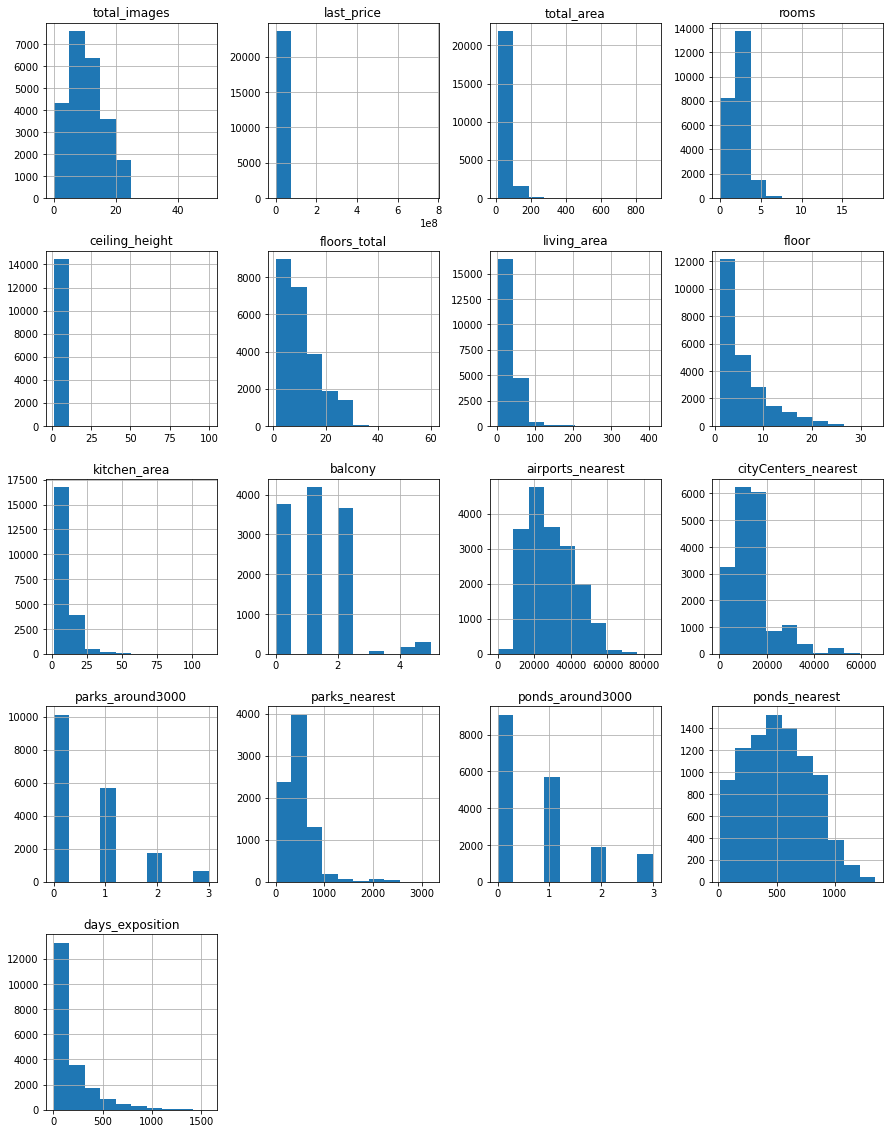

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
print(data.head(10))
data.hist(figsize=(15, 20))


### Предобработка данных

In [2]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


 #### Столбцы, в которых встречаются пропуски:

- **Высота потолков** - пропуск может означать стандартную высоту потолков (можно заполнить медианным значением)


- **Кол-во этажей в доме** -  пропуск мог оказаться случайным, либо квартира находится на последнем этаже и арендодатель не потрудился указывать одно и то же значение дважды. Можно заменить на медианное значение, при условии, что этаж квартиры не выше кол-ва этажей. В противном случае, заменить на этаж квартиры. 


- **Жилая площадь**  -  пропуск мог появиться из-за того, что общая площадь совпадает с жилой площадью, и арендодатель не потрудился указывать одно и то же значение дважды. Если это апартаменты или квартира студия, заменить можно на общую площадь, если квартира с кухней, можно заменить на разницу общей площади квартиры и площадью кухни.


- **Апартаменты** - пропуск скорее всего означает, что квартира не является апартаментами, пропуск можно заменить на 0.


- **Площадь кухни** - пропуск может означать, что квартира яляется студией, либо это апартаменты без кухни. В случае квартиры с кухней, заменить можно медианным значением, в остальных случаях можно заменить на 0.


- **Число балконов** - пропкск может означать отсутствие балкона, можно заменить на 0.


- **Название населённого пункта** - пропуск, скорее всего, случайный, ничем заменить не получится.


- **Расстояние до ближайшего аэропорта** - скорее всего, пропуск означает, что рядом нет аэропорта, заменить не получится.


- **Расстояние до центра города** - пропуск может быть случайным, заменить не получится.


- **Число парков в радиусе 3 км** - скорее всего, пропуск означает отсутствие парков рядом (можно заменить на 0).


- **Расстояние до ближайшего парка** - пропуск может означать, что рядом нет парков. Если число парков в радиусе 3 км. не 0, можно заменить пропуск на 3000 м., остальные прпуски заменить не получится.


- **Число водоёмов в радиусе 3 км** - скорее всего, пропуск означает отсутствие прудов рядом, пропуск (можно заменить на 0).


- **Расстояние до ближайшего водоёма** - пропуск может означать, что рядом нет прудов. Если число водоемов в радиусе 3 км. не 0, можно заменить пропуск на 3000 м., остальные прпуски заменить не получится.


- **Сколько дней было размещено объявление** - в столбце с ценой в момент снятия публикации нет пропусков, следовательно все объявления сняты, пропуски могди появиться случайно. Данных о том, когда было снято объявление нет, заменить прпуски не получится. 





In [3]:
#заполнение пропусков

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())  
data['is_apartment'] = data['is_apartment'].fillna(0) 
data['balcony'] = data['balcony'].fillna(0)

#этажи в доме
data.loc[data['floor']<=data['floors_total'].median(), 'floors_total'] = data.loc[data['floor']<=data['floors_total'].median(), 'floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].fillna(data['floor'])

#площадь кухни
data.loc[data['is_apartment']==0, 'kitchen_area'] = data.loc[data['is_apartment']==0, 'kitchen_area'].fillna(data['kitchen_area'].median())
data.loc[data['studio']==0, 'kitchen_area'] = data.loc[data['studio']==0, 'kitchen_area'].fillna(data['kitchen_area'].median())
data.loc[data['open_plan']==0, 'kitchen_area'] = data.loc[data['open_plan']==0, 'kitchen_area'].fillna(data['kitchen_area'].median())

data['kitchen_area'] = data['kitchen_area'].fillna(0)

#жилая площадь
data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])

#пруды и парки
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.loc[data['parks_around3000']==1,'parks_nearest'] = data.loc[data['parks_around3000']==1,'parks_nearest'].fillna(3000)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.loc[data['ponds_around3000']==1,'ponds_nearest'] = data.loc[data['ponds_around3000']==1,'ponds_nearest'].fillna(3000)

print(data.isna().sum())

 


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Изменение типов данных

- В столбце 'is_apartment' может быть только булево значение, по условию.
- В столбцах 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' может быть только целое число (т.к. там подсчет чего-либо)

In [4]:
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Устранение неявных дубликатов


In [5]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [6]:
def replace_wrong_values(duplicates, new): # на вход функции подаются список неправильных значений и строка с правильным значением
    for duplicate in duplicates: # перебираем неправильные имена
        data['locality_name'] = data['locality_name'].replace(duplicate, new)
        
replace_wrong_values('городской поселок Янино-1', 'городской посёлок Янино-1' )  
replace_wrong_values(['поселок Мурино', 'Мурино'], 'посёлок Мурино') 
replace_wrong_values('Кудрово', 'деревня Кудрово') 
replace_wrong_values('поселок городского типа Красный Бор','посёлок городского типа Красный Бор') 
replace_wrong_values('поселок городского типа Лебяжье', 'посёлок городского типа Лебяжье') 
replace_wrong_values('поселок городского типа Кузьмоловский', 'посёлок городского типа Кузьмоловский') 
replace_wrong_values('поселок Аннино', 'посёлок Аннино') 
replace_wrong_values('поселок Старая Малукса', 'посёлок Старая Малукса') 
replace_wrong_values('поселок Новый Свет','посёлок Новый Свет') 
replace_wrong_values('Никольское','село Никольское') 
replace_wrong_values('поселок Бугры','посёлок Бугры') 
replace_wrong_values(['поселок городского типа Рощино', 'городской посёлок Рощино'],'посёлок городского типа Рощино') 
replace_wrong_values('поселок Усть-Луга','посёлок Усть-Луга') 
replace_wrong_values('городской посёлок Павлово','посёлок городского типа Павлово') 
replace_wrong_values('поселок Победа','посёлок Победа') 
replace_wrong_values('поселок Терволово','посёлок Терволово') 
replace_wrong_values(['поселок городского типа Советский', 'городской посёлок Советский'],'посёлок городского типа Советский') 
replace_wrong_values('поселок Петровское','посёлок Петровское') 
replace_wrong_values('поселок городского типа Токсово','посёлок городского типа Токсово') 
replace_wrong_values('поселок городского типа Вырица','посёлок городского типа Вырица') 
replace_wrong_values('поселок Тельмана','посёлок Тельмана') 
replace_wrong_values(['поселок городского типа Большая Ижора', 'городской поселок Большая Ижора'], 'посёлок городского типа Большая Ижора') 
replace_wrong_values(['поселок городского типа Лесогорский','городской посёлок Лесогорский'],'посёлок городского типа Лесогорский') 
replace_wrong_values('поселок городского типа имени Свердлова','посёлок городского типа имени Свердлова' ) 
replace_wrong_values(['поселок Рябово', 'поселок городского типа Рябово'],'посёлок городского типа Рябово') 
replace_wrong_values('поселок Поляны','посёлок Поляны') 
replace_wrong_values('городской посёлок Мга','посёлок городского типа Мга') 
replace_wrong_values('поселок Мичуринское','посёлок Мичуринское') 
replace_wrong_values('поселок Ильичёво','посёлок Ильичёво') 
replace_wrong_values('поселок станции Вещево','посёлок при железнодорожной станции Вещево') 
replace_wrong_values('поселок Гаврилово','посёлок Гаврилово') 
replace_wrong_values(['поселок городского типа Назия', 'городской посёлок Назия'],'посёлок городского типа Назия') 
replace_wrong_values('поселок станции Приветнинское','посёлок при железнодорожной станции Приветнинское')
replace_wrong_values('поселок Мельниково','посёлок Мельниково')
replace_wrong_values(['поселок Любань','Любань'],'посёлок Любань' )
replace_wrong_values('поселок Стеклянный','посёлок Стеклянный')
replace_wrong_values('поселок городского типа Форносово','посёлок городского типа Форносово' )
replace_wrong_values('поселок Сумино','посёлок Сумино')
replace_wrong_values('поселок Возрождение','посёлок Возрождение')
replace_wrong_values('поселок Лисий Нос','посёлок Лисий Нос')
replace_wrong_values('поселок Жилгородок','посёлок Жилгородок')
replace_wrong_values(['поселок Громово','посёлок станции Громово'],'посёлок Громово' )
replace_wrong_values('поселок Коробицыно','посёлок Коробицыно')
replace_wrong_values('посёлок Кобралово','посёлок Кобралово')
replace_wrong_values(['поселок Лесное','коттеджный посёлок Лесное'],'посёлок Лесное' )
replace_wrong_values('поселок Перово','посёлок Перово')
replace_wrong_values('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')

#### Устранение редких выбивающихся значений

Аномальные значения есть в тех столбцах, гистограммы которых выглядят сильно смещенными влево или вправо. 
Изучив гистограммы можно сделать вывод, что в следующих столбцах присутствуют аномальные значения:
    
    - last_price
    - total_area 
    - rooms
    - ceiling_height 
    - floors_total
    - living_area
    - kitchen_area
        
    
Можно предположить,что в архив объявлений затисались несколько сверхкрупных квартир / пентхаусов. Однако, таких объявлений очень мало, поэтому аномальные значения в этих столбцах можно удалить.

Также, в столбце 'ceiling_height' могли случайно пропустить разделитель, в результате чего значения получились в 10 раз больше реальных. В этом столбце разделим сильно большие значения на 10, а остальные - аномально большие или маленькие - удалим. 


<AxesSubplot:>

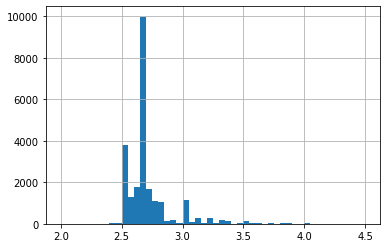

In [7]:
# столбец ceiling_height
data.loc[data['ceiling_height']>10,'ceiling_height'] = data.loc[data['ceiling_height']>10,'ceiling_height']/10
data.loc[data['ceiling_height']<2, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height']>4.5, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].hist(bins=50)

<AxesSubplot:>

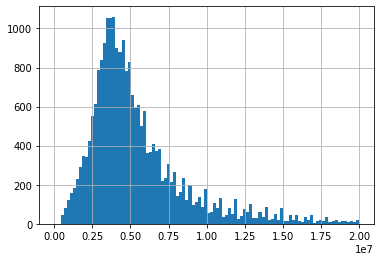

In [8]:
# столбец last_price
data = data.loc[data['last_price']<20000000]
data['last_price'].hist(bins=100)

<AxesSubplot:>

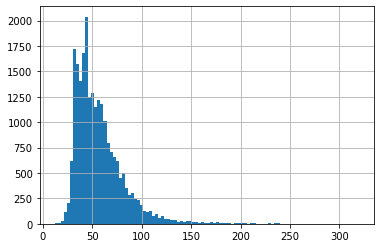

In [9]:
# столбец total_area
data = data.loc[data['total_area']<400]
data['total_area'].hist(bins=100)

<AxesSubplot:>

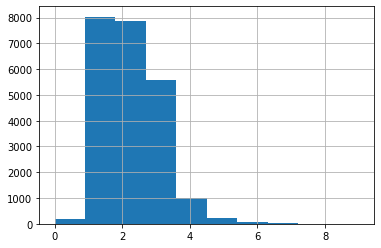

In [10]:
# столбец rooms
data = data.loc[data['rooms']<10]
data['rooms'].hist(bins=10)

<AxesSubplot:>

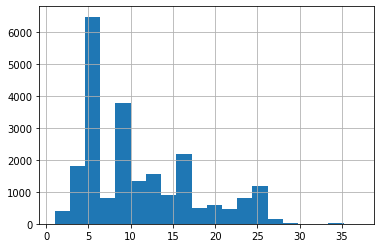

In [11]:
# столбец floors_total
data = data.loc[data['floors_total']<45]
data['floors_total'].hist(bins=20)

<AxesSubplot:>

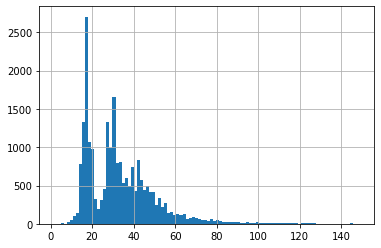

In [12]:
# столбец living_area
data = data.loc[data['living_area']<150]
data['living_area'].hist(bins=100)

<AxesSubplot:>

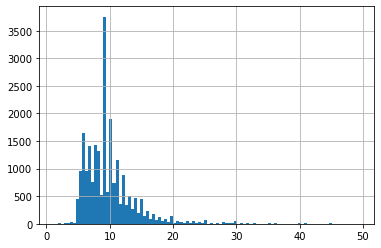

In [13]:
# столбец kitchen_area
data = data.loc[data['kitchen_area']<50]
data['kitchen_area'].hist(bins=100)

In [14]:
#Проверка на явные дубликаты 
data.duplicated().sum()

0


#### Общий итог раздела:
 - Пропуски в данных изучены и устранены там, где это возможно
 - Изменены типы данных в соответствии с содержаием столбцов
 - Устранены неявные дубликаты 
 - В следующих стлбцах устранены аномальные значения:
    - last_price
    - total_area 
    - rooms
    - ceiling_height 
    - floors_total
    - living_area
    - kitchen_area
        



### Добавление новых столбцов в таблицу

In [15]:
def ftype (df):    
    if df['floor']==1:
        return ('первый')
    elif df['floor']==df['floors_total']:
        return ('последний')
    else:
        return ('другой')

data['price_meter'] = data['last_price']/data['total_area'] #цена одного квадратного метра
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления (0 — понедельник, 1 — вторник..)
data['month_exposition'] = data['first_day_exposition'].dt.month #месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year #год публикации объявления
data['floor_type'] = data.apply(ftype, axis=1) #тип этажа квартиры (значения — «первый», «последний», «другой»)
data['cityCenters_nearest_km'] = data['cityCenters_nearest']//1000 #расстояние до центра города в километрах

print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
5            2.65            12         14.4      5         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0         

### Исследовательский анализ данных

#### Изучение параметров

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

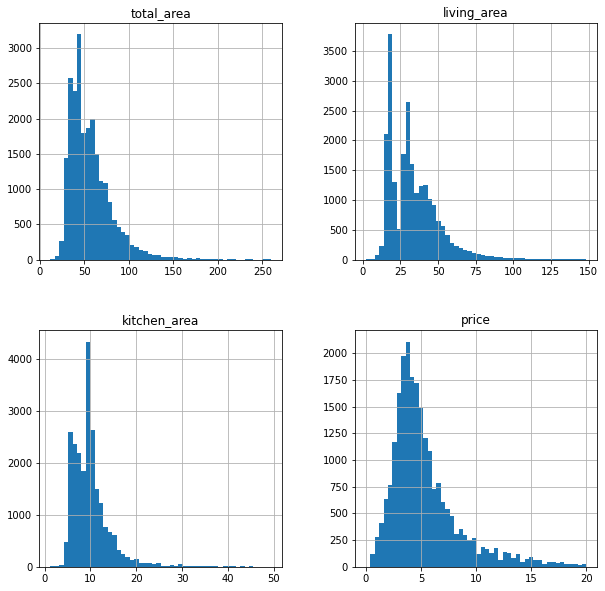

In [16]:
data['price'] = data['last_price']/1000000 #Цена объекта в млн.
data.loc[:,['total_area', 'living_area', 'kitchen_area', 'price']].hist(bins=50, figsize=(10, 10))


<AxesSubplot:>

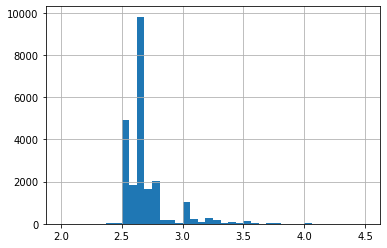

In [17]:
data['ceiling_height'].hist(bins=40)

array([[<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

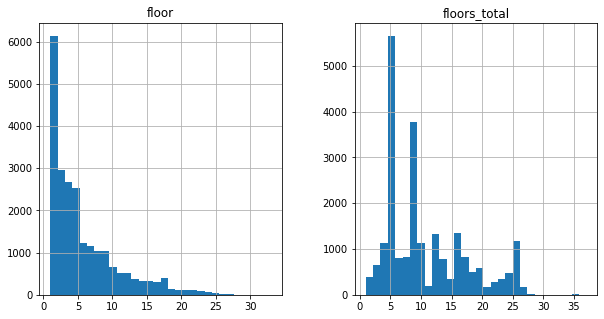

In [18]:
data.loc[:,['floor','floors_total' ]].hist(bins=30, figsize=(10,5))

0 комнат
Свободная планировака: 58
Студий: 138
Всего квартир с 0 комнат: 196


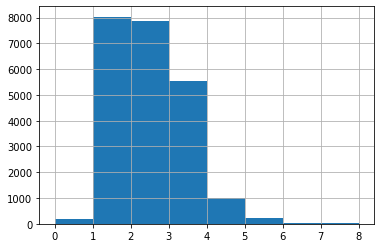

In [19]:
data['rooms'].hist(bins=8)
print('0 комнат')
print('Свободная планировака:', data.loc[data['rooms']==0,'open_plan'].sum())
print('Студий:', data.loc[data['rooms']==0,'studio'].sum())
print('Всего квартир с 0 комнат:', data.loc[data['rooms']==0,'studio'].count())

<AxesSubplot:>

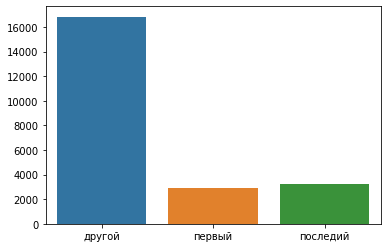

In [20]:
import seaborn
count = []
count.append(data.loc[data['floor_type']=='другой','floor_type'].count())
count.append(data.loc[data['floor_type']=='первый','floor_type'].count())
count.append(data.loc[data['floor_type']=='последний','floor_type'].count())
seaborn.barplot(x=['другой', 'первый', 'последий'], y=count)

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'parks_nearest'}>, <AxesSubplot:>]],
      dtype=object)

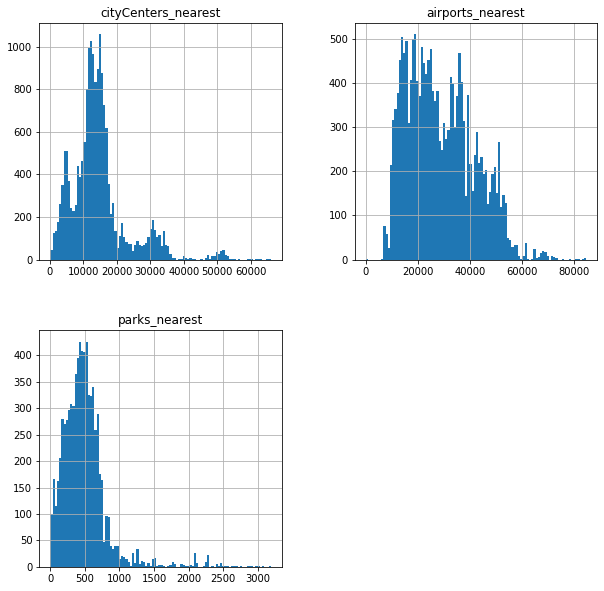

In [21]:
data.loc[:,['cityCenters_nearest', 'airports_nearest', 'parks_nearest' ]].hist(bins=100, figsize=(10,10))

array([[<AxesSubplot:title={'center':'weekday_exposition'}>,
        <AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

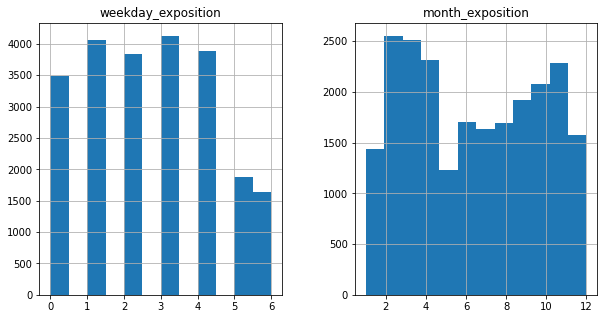

In [22]:
data.loc[:,['weekday_exposition', 'month_exposition']].hist(bins=12, figsize=(10,5))

**Описание параметорв:**

- **общая площадь** - Большинство квартир - примерно 45 м². Согласно распределению по количеству комнат, преобладают 1 и 2-х комнатные квартиры, поэтому большиство квартир имеют соответствующую площадь ~ 30-60 м².


- **жилая площадь** - 2 пика на уровнях примерно 20 м² и 30 м².Их можно объяснить тем, что большинство квартир 1-2-х комнатные и большинство квартир в стандартных 5 и 9 - этажных домах с похожей планировкой и, соответственно, площадью


- **площадь кухни** - Пик значерий на уровне 10 м² (вероятно, это стандартный размер кухни)


- **цена объекта** - У большинства квартир цена находится в диапозоне 2.5-6.5 млн. Медианная цена - примерно 4 млн.


- **количество комнат** - Среди квартир большинство - 1-2-х комнатные. Все квартиры с 0 комнат это либо квартиры-студии, либо квартиры со свободной планировкой. 


- **высота потолков** - Стандартная высота потолков, согласно гистограмме, 2.5 и 2.7 м. Однако встречается достаточно много квартир с нестандартной высотой потолков.


- **этаж квартиры** - Больше всего квартир находится на первом этаже (по сравнению с любым другим этажом).


- **тип этажа квартиры** - Большинство квартир не на первом и не на последнем этажах, как и ожидалось. Однако стоит заметить, что согласно гистограме с типом этажа квартир на последнем этаже больше, чем на первом.Этого нельзя было заметить по графику с этажом квартиры, тк последний этаж у домов может быть разным.


- **общее количество этажей в доме** - Большинство квартир в 5 и 9-этажных домах (Не удивительно, это стандартные размеры домов, построенных в советское время). Также, достаточно много домов, в которых >10 этажей. 


- **расстояние до центра города в метрах** - Большинство квартир находятся на расстоянии 10-15 км. от центра города. Нельзя сказать много это или мало, тк значения представлены как для больших, так и для маленьких городов.


- **расстояние до ближайшего аэропорта** - Сравнивая масштаб графика с масштабом графика площади квартир, можно сказать, что квартир, рядом с которыми находится аэропорт не много.


- **расстояние до ближайшего парка**- Представлены только те квартиры, парк рядом с которыми находится ближе, чем в 3км. Если сравнить масштаб графика с с масштабом графика площади квартир, можно сделать вывод, что квартир, рядом с которыми парк находится в шаговой доступности не много.


- **день и месяц публикации объявления** - В будние дни происходило примерно в 2 раза больше публикаций, чем в выхоные. Минимум публикаций происходило в январе, мае и декабре (в эти месяцы больше всего праздников и, соответственно, выходных). Также, не особо много публикаций в летние месяца (сезон отпусков).

#### Как быстро продавались квартиры

<AxesSubplot:>

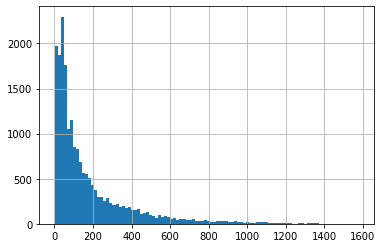

In [23]:
data['days_exposition'].hist(bins=100)

<AxesSubplot:>

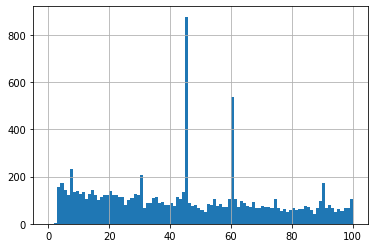

In [24]:
data['days_exposition'].hist(bins=100, range=(0,100))

Примерно на 45 и 60 днях наблюдаются пики. Размещение где-либо объявления о продаже объекта, как правило, платная услуга. Возможно, продавцы размещали объявление на минимальный срок (45 дней) или на средний срок продажи квартиры, согласно интернет запросу (2 месяца), в надежде быстро продать квартиру, и по окончании оплаченного срока объявление автоматически снималось.
Если квартира к тому моменту не была продана, объявление размещалось по новой с новой датой и его срок размещения рассчитывался по новой. 
    
Проверим таблицу на наличие дубликатов по срезу без дат. При создании нового объявления по тому же объекту, продавец мог изменить цену, количество фотографий и забыть внести какие-либо характеристики, поэтому будем поверять по тем столбцам, которые наиболее точно характеризуют объект. 

In [25]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_meter', 'weekday_exposition',
       'month_exposition', 'year_exposition', 'floor_type',
       'cityCenters_nearest_km', 'price'],
      dtype='object')

In [26]:
data.loc[:,['total_area','rooms','floor', 'locality_name','studio','open_plan','floors_total']].duplicated().sum()

3425

Нельзя с полной уверенностью сказать, что реализуется именно эта гипотеза, ведь как выяснялось ранее, у многих квартир схожие характеристики.  Однако наличие дубликатов показывает, что она не лишина смысла.


In [27]:
print(data['days_exposition'].describe())

count    19960.000000
mean       177.818587
std        216.471342
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64


График смещен влево, среднее значение практически в 2 раза больше медианы.


Ориентируясь на значение медианы, продажи со значением "days_exposition" < 44 можно назвать быстрыми (Значения меньше первого квартиля).


Аналогично, необычно долгими можно назвать продажи со значением "days_exposition" > 320 (Значения больше правого 'уса' диаграммы размаха (больше, чем Q3 + 1.5*IQR)).

#### Факторы, влияющие на общую стоимость объекта

0.772757946221148

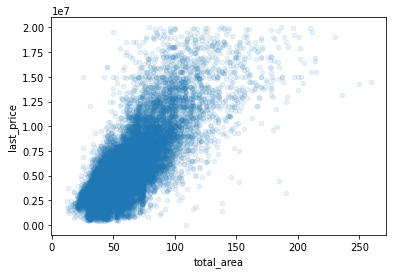

In [28]:
# Графики общей площади, жилой площади и площади кухни
data.plot.scatter(x="total_area",
                         y="last_price",
                         alpha=0.1);
data['total_area'].corr(data['last_price'])

0.648703163286019

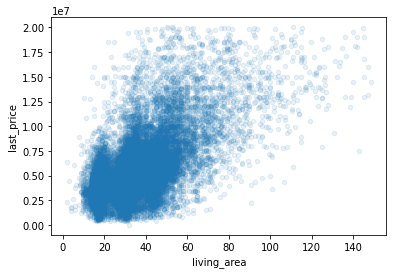

In [29]:
data.plot.scatter(x="living_area",
                         y="last_price",
                         alpha=0.1);
data['living_area'].corr(data['last_price'])

0.551025103286495

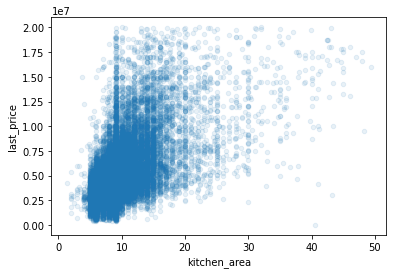

In [30]:
data.plot.scatter(x="kitchen_area",
                         y="last_price",
                         alpha=0.1);
data['kitchen_area'].corr(data['last_price'])

Получены следующие коэффициенты Пирсона:
 - для общей площади -> 0.77
 - для жилой площади -> 0.65
 - для площади кухни -> 0.55
 
 
Таким образом, у всех графиков прослеживается связь между площадью и ценой объекта(чем больше площадь, тем больше цена). Наиболее близкая к линейной - связь между общей площадью и ценой объекта.

<AxesSubplot:xlabel='rooms'>

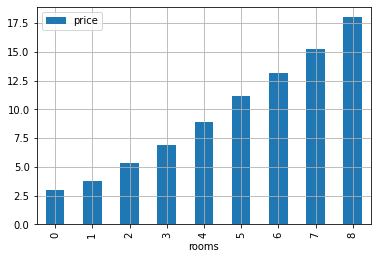

In [31]:
#График зависимости цены от количества комнат
(data.pivot_table(index='rooms', values='price')
    .plot(kind='bar', grid=True))

Чем больше комнат, тем дороже объект. Самые дешевые - квартиры со свободной планировкой и студии.

<AxesSubplot:xlabel='floor_type'>

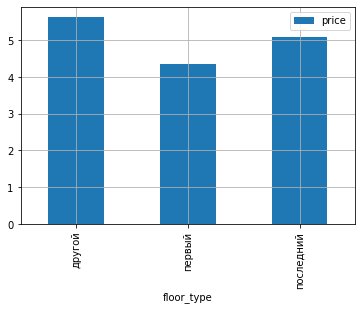

In [32]:
#График зависимости цены от этажа, на котором расположена квартира
(data.pivot_table(index='floor_type', values='price')
    .plot(kind='bar', grid=True))

Цены на квартиры на первом и последнем этажах ниже, чем на любых других этажах. Квартиры на первом этаже дешевле, чем квартиры на последнем.

<AxesSubplot:xlabel='year_exposition'>

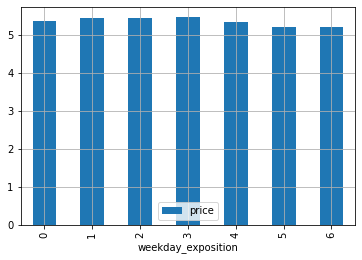

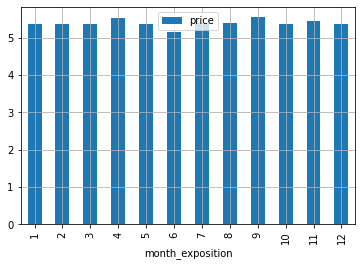

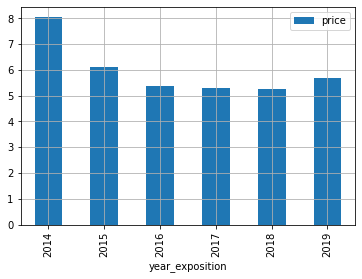

In [33]:
# График по дате размещения (день недели, месяц, год)

(data.pivot_table(index='weekday_exposition', values='price')
    .plot(kind='bar', grid=True)
)
(data.pivot_table(index='month_exposition', values='price')
    .plot(kind='bar', grid=True)
)
(data.pivot_table(index='year_exposition', values='price')
    .plot(kind='bar', grid=True)
)


**Итого: Факторы, влияющие на цену**


- **Площадь.** В среднем, с увеличением площади квартиры увеличивается ее цена. На графиках зависимостей цены от жилой площади и площади кухни эта зависимость не такая явная, но тенденция роста цены в зависимости от увеличения площади сохранятеся.


- **Кол-во комнат.** Чем больше комнат, тем выше цена объекта


- **Этаж.** Цены на квартиры на первом и последнем этажах ниже, чем на любых других этажах. Квартиры на первом этаже дешевле, чем квартиры на последнем.


- **Дата размещения объявления.** День и месяц публикации не влияют на цену квартиры. С 2014 года, цены на квартиры падали вплоть до 2019 года. В 2019 цена на квартиры немного выросла, относительно 2018 года.


#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [34]:
top_10 = (data.pivot_table(index='locality_name',values='price_meter',aggfunc=['count','mean'])
          .sort_values(by=('count', 'price_meter'), ascending= False)
          .head(10))
print(top_10)
print()
print('Минимальная стоимость м^2:', top_10.loc[top_10['mean']['price_meter']==top_10['mean']['price_meter'].min()])
print('Максимальная стоимость м^2:', top_10.loc[top_10['mean']['price_meter']==top_10['mean']['price_meter'].max()])

                        count           mean
                  price_meter    price_meter
locality_name                               
Санкт-Петербург         14982  108657.971168
посёлок Мурино            589   86087.266936
посёлок Шушары            440   78677.364217
Всеволожск                397   67214.252635
Пушкин                    358  101864.461701
Колпино                   337   75333.295801
посёлок Парголово         326   90332.263023
Гатчина                   307   68746.146763
деревня Кудрово           299   92473.547576
Выборг                    237   58141.909153

Минимальная стоимость м^2:                     count          mean
              price_meter   price_meter
locality_name                          
Выборг                237  58141.909153
Максимальная стоимость м^2:                       count           mean
                price_meter    price_meter
locality_name                             
Санкт-Петербург       14982  108657.971168


Среди  10 населённых пунктов с наибольшим числом объявлений, наименьшая стоимость м² в городе Выборг, наибольшая - в городе Санкт-Петербург. 

#### Зависимость стоимости объектов от расстояния до центра города в г.Санкт-Петербург

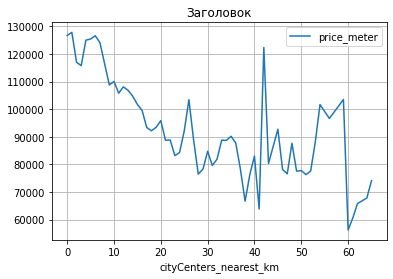

In [35]:
(data.pivot_table(index='cityCenters_nearest_km',values='price_meter',aggfunc='mean')
          .sort_values(by=('cityCenters_nearest_km'))
          .plot(grid = True, title = 'Заголовок'));


В промежутке 0-40 км. от центра города наблюдается следующая тенденция: чем ближе объект к центру города, тем дороже он стоит.
На уровне примерно 40 км от центра наблюдается резкий скачок цен. Объяснить его можно тем, что примерно на этом расстоянии от центра города находится Петергоф. Начиная с 40 км и далее обнаружить зависимость цены от расстояния не получается. 

### Общий вывод

**В ходе исследования объявлений о продаже квартир, были получены следующие результаты:**

 - Пропуски в данных изучены и устранены там, где это возможно
 - Изменены типы данных в соответствии с содержанием столбцов
 - Устранены неявные дубликаты 
 - В следующих столбцах устранены аномальные значения:
    - last_price
    - total_area 
    - rooms
    - ceiling_height 
    - floors_total
    - living_area
    - kitchen_area


Наиболее часто встречающимися в объявлениях оказались:
- 1-2-х комнатные квартиры
- Квартиры площадью 30-60 м² со стандартными жилой площадью (~ 20/30 м²) и площадью кухни (~10 м²)
- Цена у большинства квартир находится в диапазоне 2.5-6.5 млн. Медианная цена - примерно 4 млн.
- Наиболее часто встречается стандартная высота потолков (~ 2.5-2.7 м)
- Большинство квартир в 5 и 9-этажных домах
- Квартир на последних этажах больше, чем на первых
- Квартир рядом с аэропортом/парком немного
- В будние дни объявления публиковались примерно в 2 раза чаще, чем в выходные
- В месяцы с большим количеством выходных (январь, май, декабрь) и в период отпусков (июнь, июль, август) объявления публиковались реже, чем в другие месяцы


Срок действия объявлений (от публикации до снятия) для большинства объектов - от 44 до 227 дней (1-я и 3-я квартили).
Необычно долгий срок - 320 дней и больше.


На графике срока действия объявлений примерно на 45 и 60 днях наблюдаются пики. Размещение где-либо объявления о продаже объекта, как правило, платная услуга. Возможно, продавцы размещали объявление на минимальный срок (45 дней) или на средний срок продажи квартиры, согласно интернет запросу (2 месяца), в надежде быстро продать квартиру, и по окончании оплаченного срока объявление автоматически снималось.
Если квартира к тому моменту не была продана, объявление размещалось заново с новой датой и его срок размещения рассчитывался по новой.


Факторы, влияющие на цену объекта:
 -  С увеличением общей площади квартиры увеличивается ее цена (Увеличение жилой площади или площади кухни также приводит к увеличению цены, но на графиках это не просматривается так явно, как с общей площадью)
 
     Коэффициенты Пирсона:
     - для общей площади -> 0.77
     - для жилой площади -> 0.65
     - для площади кухни -> 0.55
 
 
 
 - Чем больше комнат, тем выше цена объекта
 - Цены на квартиры на первом и последнем этажах ниже, чем на любых других этажах. Квартиры на первом этаже дешевле, чем квартиры на последнем.
 - День и месяц публикации не влияют на цену квартиры 
 - С 2014 года, цены на квартиры падали вплоть до 2019 года. В 2019 цена на квартиры немного выросла, относительно 2018 года.

Среди 10 населённых пунктов с наибольшим числом объявлений, наименьшая стоимость м² в городе Выборг, наибольшая - в городе Санкт-Петербург.

**Для г.Санкт-Петербург:** В промежутке 0-40 км. от центра города наблюдается следующая тенденция: чем ближе объект к центру города, тем дороже он стоит. На уровне примерно 40 км от центра наблюдается резкий скачок цен. Объяснить его можно тем, что примерно на этом расстоянии от центра города находится Петергоф. Начиная с 40 км и далее обнаружить зависимость цены от расстояния не получается.
